In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [59]:
train = pd.read_csv("Train_UWu5bXk.txt")
test = pd.read_csv("Test_u94Q5KV.txt")
submission = pd.read_csv("SampleSubmission_TmnO39y.txt")

In [5]:
submission.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049                NaN
1           FDW14            OUT017                NaN
2           NCN55            OUT010                NaN
3           FDQ58            OUT017                NaN
4           FDY38            OUT027                NaN

In [6]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [7]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [8]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [9]:
train.shape

(8523, 12)

In [10]:
test.shape

(5681, 11)

In [147]:
train["source"] = "train"
test["source"] = "test"

In [148]:
df = pd.concat([train,test])

In [62]:
df.shape

(14204, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [64]:
df.describe().T

count         mean          std       min  \
Item_MRP                   14204.0   141.004977    62.086938    31.290   
Item_Outlet_Sales           8523.0  2181.288914  1706.499616    33.290   
Item_Visibility            14204.0     0.065953     0.051459     0.000   
Item_Weight                11765.0    12.792854     4.652502     4.555   
Outlet_Establishment_Year  14204.0  1997.830681     8.371664  1985.000   

                                   25%          50%          75%           max  
Item_MRP                     94.012000   142.247000   185.855600    266.888400  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800  
Item_Visibility               0.027036     0.054021     0.094037      0.328391  
Item_Weight                   8.710000    12.600000    16.750000     21.350000  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000

In [65]:
df.duplicated().sum()

0

In [66]:
df.isna().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [67]:
df.Item_Fat_Content.nunique()

5

In [68]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [69]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [70]:
df.Item_Fat_Content.replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}, inplace=True)

In [71]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

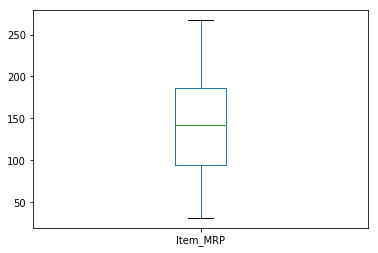

In [72]:
%matplotlib inline
df.Item_MRP.plot(kind="box")

In [73]:
df["Item_Info"] = df.Item_Identifier.apply(lambda x : x[0:2])

In [74]:
df["Item_Info"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Info, dtype: int64

In [75]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

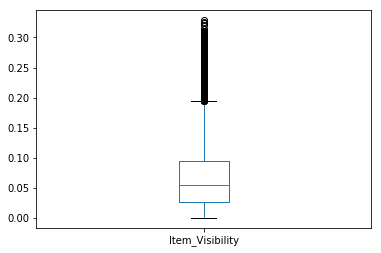

In [76]:
df.Item_Visibility.plot(kind="box")

In [77]:
df.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [78]:
df.loc[df.Item_Visibility==0.000000,"Item_Visibility"]=np.NAN

In [54]:
df.Item_Visibility.isna().sum()

879

In [58]:
#df.Item_Visibility.fillna(df.Item_Visibility.median(),inplace = True)

In [83]:
df["Item_Visibility"] = df.groupby("Item_Info").Item_Visibility.transform(lambda x : x.fillna(x.median()))

In [84]:
df["Item_Visibility"].isna().sum()

0

In [85]:
df["Item_Weight"].isna().sum()

2439

In [86]:
df.corr()

Item_MRP  Item_Outlet_Sales  Item_Visibility  \
Item_MRP                   1.000000           0.567574        -0.008446   
Item_Outlet_Sales          0.567574           1.000000        -0.133825   
Item_Visibility           -0.008446          -0.133825         1.000000   
Item_Weight                0.036236           0.014123        -0.018315   
Outlet_Establishment_Year  0.000141          -0.049135        -0.088469   

                           Item_Weight  Outlet_Establishment_Year  
Item_MRP                      0.036236                   0.000141  
Item_Outlet_Sales             0.014123                  -0.049135  
Item_Visibility              -0.018315                  -0.088469  
Item_Weight                   1.000000                   0.000645  
Outlet_Establishment_Year     0.000645                   1.000000

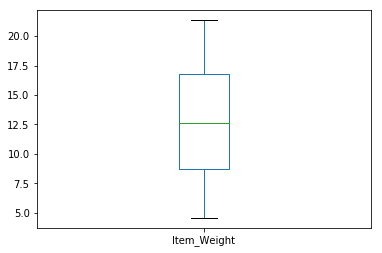

In [87]:
df["Item_Weight"].plot(kind="box")

In [89]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [90]:
df["Item_Weight"].isna().sum()

0

In [92]:
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [93]:
df["Outlet_Age"] = 2019-df.Outlet_Establishment_Year

In [94]:
df["Outlet_Age"].value_counts()

34    2439
32    1553
15    1550
22    1550
20    1550
17    1548
10    1546
12    1543
21     925
Name: Outlet_Age, dtype: int64

In [95]:
df.drop(columns="Outlet_Establishment_Year",inplace=True)

In [97]:
df.Outlet_Age

0       20
1       10
2       20
3       21
4       32
5       10
6       32
7       34
8       17
9       12
10      20
11      22
12      20
13      22
14      32
15      22
16      10
17      20
18      34
19      15
20      32
21      34
22      15
23      34
24      22
25      12
26      15
27      32
28      21
29      34
        ..
5651    32
5652    17
5653    15
5654    32
5655    34
5656    34
5657    22
5658    32
5659    20
5660    32
5661    34
5662    12
5663    10
5664    10
5665    34
5666    22
5667    22
5668    21
5669    34
5670    12
5671    20
5672    20
5673    10
5674    22
5675    20
5676    22
5677    10
5678    17
5679    12
5680    17
Name: Outlet_Age, Length: 14204, dtype: int64

In [96]:
df.Outlet_Identifier

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
5       OUT018
6       OUT013
7       OUT027
8       OUT045
9       OUT017
10      OUT049
11      OUT046
12      OUT049
13      OUT046
14      OUT013
15      OUT046
16      OUT018
17      OUT049
18      OUT027
19      OUT035
20      OUT013
21      OUT027
22      OUT035
23      OUT019
24      OUT046
25      OUT017
26      OUT035
27      OUT013
28      OUT010
29      OUT019
         ...  
5651    OUT013
5652    OUT045
5653    OUT035
5654    OUT013
5655    OUT027
5656    OUT027
5657    OUT046
5658    OUT013
5659    OUT049
5660    OUT013
5661    OUT027
5662    OUT017
5663    OUT018
5664    OUT018
5665    OUT027
5666    OUT046
5667    OUT046
5668    OUT010
5669    OUT027
5670    OUT017
5671    OUT049
5672    OUT049
5673    OUT018
5674    OUT046
5675    OUT049
5676    OUT046
5677    OUT018
5678    OUT045
5679    OUT017
5680    OUT045
Name: Outlet_Identifier, Length: 14204, dtype: object

In [98]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [101]:
df.Outlet_Size.isna().sum()

4016

In [103]:
df["Outlet_Size"] = df.groupby("Outlet_Location_Type").Outlet_Size.transform(lambda x : x.fillna(x.mode()[0]))

In [104]:
df.Outlet_Size.isna().sum()

0

In [106]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [108]:
df.loc[df.Outlet_Type.str.contains("Supermarket"),"Outlet_Category"]="Supermarket"

In [109]:
df.loc[df.Outlet_Type.str.contains("Grocery"),"Outlet_Category"]="Grocery"

In [110]:
df.Outlet_Category.value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_Category, dtype: int64

In [115]:
df_column_numeric = df.select_dtypes(include=np.number).columns

In [116]:
df_column_category = df.select_dtypes(exclude=np.number).columns

In [117]:
df_column_category

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Item_Info', 'Outlet_Category'],
      dtype='object')

In [118]:
df.select_dtypes(exclude=np.number)

Item_Fat_Content Item_Identifier              Item_Type  \
0             Low Fat           FDA15                  Dairy   
1             Regular           DRC01            Soft Drinks   
2             Low Fat           FDN15                   Meat   
3             Regular           FDX07  Fruits and Vegetables   
4             Low Fat           NCD19              Household   
5             Regular           FDP36           Baking Goods   
6             Regular           FDO10            Snack Foods   
7             Low Fat           FDP10            Snack Foods   
8             Regular           FDH17           Frozen Foods   
9             Regular           FDU28           Frozen Foods   
10            Low Fat           FDY07  Fruits and Vegetables   
11            Regular           FDA03                  Dairy   
12            Regular           FDX32  Fruits and Vegetables   
13            Regular           FDS46            Snack Foods   
14            Low Fat           FDF32  Fruits and Vegetables   
15            Regular           FDP49              Breakfast   
16            Low Fat           NCB42     Health and Hygiene   
17            Regular           FDP49              Breakfast   
18            Low Fat           DRI11            Hard Drinks   
19            Low Fat           FDU02                  Dairy   
20            Regular           FDN22            Snack Foods   
21            Regular           FDW12           Baking Goods   
22            Low Fat           NCB30              Household   
23            Low Fat           FDC37           Baking Goods   
24            Regular           FDR28           Frozen Foods   
25            Low Fat           NCD06              Household   
26            Regular           FDV10            Snack Foods   
27            Low Fat           DRJ59            Hard Drinks   
28            Regular           FDE51                  Dairy   
29            Regular           FDC14                 Canned   
...               ...             ...                    ...   
5651          Regular           FDD23          Starchy Foods   
5652          Low Fat           FDP32  Fruits and Vegetables   
5653          Regular           FDO31  Fruits and Vegetables   
5654          Low Fat           FDQ57            Snack Foods   
5655          Regular           FDX32  Fruits and Vegetables   
5656          Low Fat           FDC39                  Dairy   
5657          Low Fat           FDU55  Fruits and Vegetables   
5658          Low Fat           FDL45            Snack Foods   
5659          Low Fat           DRK37            Soft Drinks   
5660          Low Fat           FDK22            Snack Foods   
5661          Low Fat           DRG37            Soft Drinks   
5662          Low Fat           FDK22            Snack Foods   
5663          Low Fat           DRH36            Soft Drinks   
5664          Regular           DRC36            Soft Drinks   
5665          Low Fat           DRE03                  Dairy   
5666          Regular           FDF34            Snack Foods   
5667          Low Fat           FDZ22            Snack Foods   
5668          Low Fat           FDC44  Fruits and Vegetables   
5669          Low Fat           FDN31  Fruits and Vegetables   
5670          Regular           FDO03                   Meat   
5671          Regular           FDA01                 Canned   
5672          Low Fat           NCH42              Household   
5673          Low Fat           FDF46            Snack Foods   
5674          Low Fat           DRL35            Hard Drinks   
5675          Regular           FDW46            Snack Foods   
5676          Regular           FDB58            Snack Foods   
5677          Regular           FDD47          Starchy Foods   
5678          Low Fat           NCO17     Health and Hygiene   
5679          Regular           FDJ26                 Canned   
5680          Regular           FDU37                 Canned   

     Outlet_Identifier Outlet_Locati

In [126]:
a = df_column_category.drop(["source","Item_Identifier","Outlet_Identifier"])

In [127]:
a

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'Item_Info', 'Outlet_Category'],
      dtype='object')

In [130]:
df_category_onehot = pd.get_dummies(df[df_column_category.drop(["source","Item_Identifier","Outlet_Identifier"])])

In [134]:
df_final = pd.concat([df_category_onehot,df[df_column_numeric],df["Item_Identifier"],df["Outlet_Identifier"],df["source"]], axis = 1)

In [136]:
train_final = df_final[df_final.source=="train"]
test_final = df_final[df_final.source=="test"]


In [137]:
train_final.shape

(8523, 41)

In [140]:
train_final.drop(columns="source",inplace=True)

In [138]:
test_final.shape

(5681, 41)

In [141]:
df_column_numeric

Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Age'],
      dtype='object')

In [142]:
test_final.isna().sum()

Item_Fat_Content_Low Fat              0
Item_Fat_Content_Regular              0
Item_Type_Baking Goods                0
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                 0
Item_Type_Soft Drinks                 0
Item_Type_Starchy Foods               0
Outlet_Location_Type_Tier 1           0
Outlet_Location_Type_Tier 2           0
Outlet_Location_Type_Tier 3           0
Outlet_Size_High                      0
Outlet_Size_Medium                    0
Outlet_Size_Small                     0
Outlet_Type_Grocery Store             0


In [143]:
test_final.drop(columns=["source","Item_Outlet_Sales"],inplace=True)

In [146]:
train_final.shape

(8523, 40)

In [144]:
test_final.shape

(5681, 39)

In [151]:
train_X = train_final.drop(columns=["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier"])

In [152]:
train_Y = train_final["Item_Outlet_Sales"]

In [161]:
test_X = test_final.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
a = cross_val_score(model, train_X, train_Y, cv=5, scoring='neg_mean_squared_error')


In [182]:
np.mean(np.sqrt(np.abs(a)))

1133.2849628465156

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
model = LinearRegression()

In [188]:
model.fit(train_X, train_Y)
        
    #Predict training set:
dtrain_predictions = model.predict(train_X)

In [189]:
dtrain_predictions

array([4007.43922128,  559.88239033, 2369.11318583, ..., 1429.17036159,
       1400.10821764, 1209.40443017])

In [190]:
#Print model report:
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(train_Y.values, dtrain_predictions)))
    
#Predict on testing data:
test_final["res_linear"] =  model.predict(test_X)
    


Model Report
RMSE : 1128


In [174]:
Linear_submission = test_final[["Item_Identifier","Outlet_Identifier","res_linear"]]

In [176]:
Linear_submission.columns = submission.columns

In [178]:
Linear_submission.to_csv("res-LinearRegression.csv",index=False)